In [1]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px

In [20]:
# Connect data
df = pd.read_csv('/Users/haribudiarto/Downloads/airbnb.csv')
# Preview data
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [21]:
# Remove space from column name
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df = df.rename(columns={'Neighbourhood_': 'Neighbourhood', 'Review_Scores_Rating_(bin)': 'Review_Scores_Rating(bin)'})
df.head()

,Host_Id,Host_Since,Name,Neighbourhood,Property_Type,Review_Scores_Rating(bin),Room_Type,Zipcode,Beds,Number_of_Records,Number_Of_Reviews,Price,Review_Scores_Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/08,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/08,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
# Check data type
df.dtypes

Host_Id                        int64
Host_Since                    object
Name                          object
Neighbourhood                 object
Property_Type                 object
Review_Scores_Rating(bin)    float64
Room_Type                     object
Zipcode                      float64
Beds                         float64
Number_of_Records              int64
Number_Of_Reviews              int64
Price                         object
Review_Scores_Rating         float64
dtype: object

In [22]:
# Drop NA and Transform column into numeric
df.dropna(inplace=True)
df['Price'] = df['Price'].replace(',', '.')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df.dtypes

Host_Id                        int64
Host_Since                    object
Name                          object
Neighbourhood                 object
Property_Type                 object
Review_Scores_Rating(bin)    float64
Room_Type                     object
Zipcode                      float64
Beds                         float64
Number_of_Records              int64
Number_Of_Reviews              int64
Price                        float64
Review_Scores_Rating         float64
dtype: object

In [92]:
# Visualizing Neighbourhood and Room Type Distribution
fig = px.sunburst(df, path=['Neighbourhood', 'Room_Type'], values='Number_of_Records',
                  labels= 'Number_of_Records',color_discrete_sequence=px.colors.qualitative.Antique,
                 title = "Neighbourhood and Room Type Distribution")
fig.update_traces(textinfo="label+percent root")
fig.show('png')

TAKEAWAYS:
- 91% of rent listings dominated from Manhattan and Brooklyn.
- Entire home/apt is more common on Manhattan and Brooklyn. In Queens, private room is more common than entire home/apt.

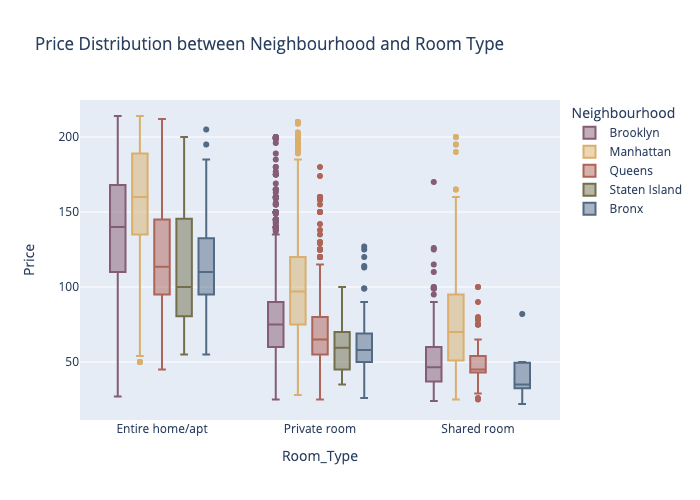

In [99]:
# Visualizing price distribution between location and room type

# Remove the outlier of price
dfo = df
z_scores = np.abs((dfo['Price'] - dfo['Price'].mean()) / dfo['Price'].std())
threshold = 2  # Adjust the threshold as needed
dfo['Price'] = np.where(z_scores > threshold, np.nan, df['Price'])
dfo = dfo.dropna()

fig = px.box(dfo,y = "Price", x = 'Room_Type', color = 'Neighbourhood',
             title = 'Price Distribution between Neighbourhood and Room Type',
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.show('png')

TAKEAWAYS:
- Manhattan is the most expensive across all room type.
- Price for private room in Manhattan nearly the same as entire home in Queens, Staten and Bronx.

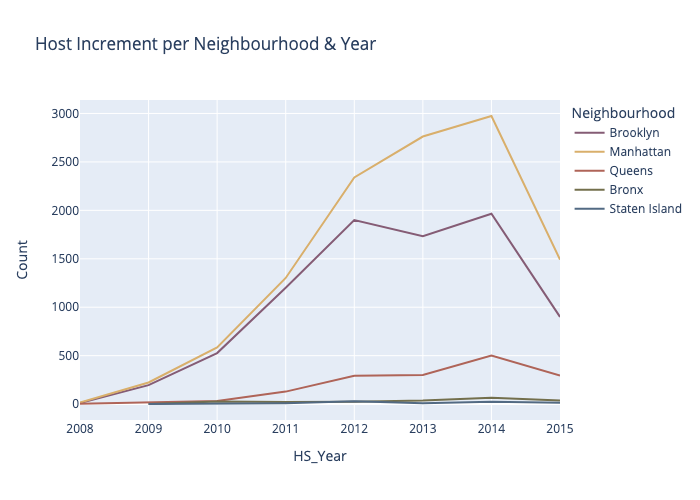

In [95]:
# Visualizing host increment per neighbourhood per yead
df['Host_Since_Date'] = pd.to_datetime(df['Host_Since'])
df['HS_Year'] = df['Host_Since_Date'].dt.year
df['HS_Month'] = df['Host_Since_Date'].dt.month
df['HS_Day'] = df['Host_Since_Date'].dt.day

group = df.groupby(['HS_Year','Neighbourhood']).size().reset_index(name='Count')
fig = px.line(group, x = "HS_Year", y = "Count", color = "Neighbourhood", 
              title = 'Host Increment per Neighbourhood & Year',color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_xaxes(type='category')
fig.show('png')

TAKEAWAYS:
- 2014 is the year with most increment rent listings in all neighbourhood.
- On 2015, all neighbourhood faces sharp decline in rent listings increment.